In [1]:
# 必要なライブラリをインポート
import sklearn as skl
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# 訓練データの読み込み
df = pd.read_table('/content/drive/MyDrive/Wine_Variety_Prediction/train.tsv', sep="\t", index_col=0)
# テストデータの読み込み
df_test = pd.read_table('/content/drive/MyDrive/Wine_Variety_Prediction/test.tsv', sep="\t", index_col=0)
# 訓練データを表示
df

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
id,,,,,,,,,,,,,,
0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
172,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
173,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270


In [4]:
# 標準化するためのライブラリをインポート
from sklearn.preprocessing import StandardScaler as SC
# インスタンスを生成
sc = SC()
# sc関数を作って準備しておく、axis=1はデータを1次元になるようにする意味。
sc.fit(df.drop('Y',axis=1))
# sc.transformでsc関数を適用して、pdでDataFrame型として格納する
dfs = pd.DataFrame(sc.transform(df.drop('Y',axis=1)),columns=df.drop('Y',axis=1).columns)
# 標準化された訓練データを表示
dfs.head()
# テストデータも上記同様
# テスト用のデータを選び、トレーニングデータで作ったsc関数を適用
dfs_test = pd.DataFrame(sc.transform(df_test),columns=df_test.columns)
dfs_test

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.347625,-0.106092,-0.288847,-0.407695,0.315695,1.095308,1.273594,-1.061867,1.285169,0.281032,1.232022,0.817160,2.417299
1,0.284599,0.899895,-0.354763,-0.281706,-0.177232,-0.901927,-1.220143,1.956757,0.452780,2.303865,-1.785867,-1.582030,-0.222237
2,-1.120549,-1.015010,0.403274,1.104173,-1.585594,-0.554581,-0.469017,0.331344,-0.314324,-1.224430,1.494448,0.166777,-0.364488
3,-1.120549,-0.397298,-0.222930,-0.281706,-1.374340,-1.249272,-0.549138,1.260152,0.077389,-1.139615,0.488484,-0.483605,-0.838656
4,1.591998,-0.317878,1.095396,0.096261,1.371966,0.834799,1.093324,-0.210460,0.615993,0.471866,0.444747,0.065607,1.690241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.103251,-0.529665,-0.882093,-0.911651,0.034022,1.355817,1.343699,-1.139267,0.893456,0.429458,-0.255054,1.048407,0.757710
85,-0.436303,-0.812047,-1.211675,-0.710068,-0.036396,-0.519847,-0.639273,1.337552,-1.587389,0.281032,0.051109,-1.466406,-0.933490
86,0.492317,2.047073,1.556810,1.356151,0.808621,-0.589316,-1.089948,-0.674864,-0.787643,1.447236,-1.304754,-0.989459,-0.364488
87,-0.766207,-1.067956,-0.948010,-0.281706,-0.881413,2.085242,1.704239,-0.907066,0.583351,-0.249060,0.313534,0.239042,-0.269654


In [5]:
# 主成分分析の実行
# PCA()のインスタンス生成
pca = PCA()
# pca関数を用意
pca.fit(dfs)

# データを主成分空間に写像

# 訓練データにpca関数を適用
feature = pca.transform(dfs)
# テストデータpca関数を適用
test_feature = pca.transform(dfs_test)
# DataFrame型にPC1~PC3までを格納
pd.DataFrame(feature[:,:3])

,0,1,2
0,-3.173219,0.842044,-0.065713
1,-1.148321,-0.282996,2.753837
2,2.017446,-0.079828,-0.467545
3,1.065284,-0.026498,-0.244806
4,1.140050,1.183989,3.049416
...,...,...,...
84,0.921019,-1.420664,-0.160016
85,-2.863620,1.527147,-0.689779
86,2.124282,1.167122,-0.032651
87,-2.162863,1.961086,0.114943


In [6]:
# PC1~PC3までを格納
pd.DataFrame(test_feature[:,:3])

,0,1,2
0,3.373642,1.225789,-0.785763
1,-2.851474,2.190801,-1.088922
2,-0.455782,-2.150022,1.343412
3,-1.449698,-1.941849,0.238659
4,2.161893,2.228932,0.129371
...,...,...,...
84,2.670859,0.588486,-1.080731
85,-1.880035,-1.025042,-1.315574
86,-2.368346,2.396517,0.687569
87,2.193357,-1.196047,0.165827


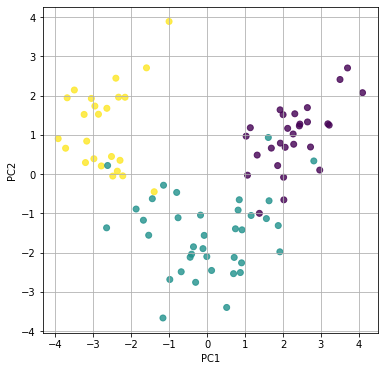

In [7]:
# グラフサイズを指定
plt.figure(figsize=(6,6))
# scatter関数で散布図を作成
plt.scatter(feature[:, 0],feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
# グラフ内に線を表示
plt.grid()
# xラベルを追加
plt.xlabel("PC1")
# yラベルを追加
plt.ylabel("PC2")
# 作成したグラフを表示
plt.show()

In [17]:
# ライブラリのインポート
import numpy as np
import pandas as pd
# K-NNライブラリをインポート
from sklearn.neighbors import KNeighborsClassifier
# GridSearchライブラリをインポート、最適なハイパーパラメータを見つける
from sklearn.model_selection import GridSearchCV
# 訓練データをtrainとtestデータにわけるためのライブラリ
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
# ↑文字列のlabelを数値に変換するもの

In [18]:
# PC1~PC2までをdataに格納
data = feature[:, :3]
#　dataとdf['Y']を対応付ける
X_train,X_test,y_train,y_test = train_test_split(data,df['Y'],random_state=0)

In [23]:
# GridSearchのパラメータの候補を決める
tuned_parameters = [
    {'n_neighbors':[1, 3, 5, 7, 9, 11, 15, 21],
    'weights':['uniform','distance'],
    'p':[1,2]}
    ]
# GridSearchのパラメータを設定
clf = GridSearchCV(
    KNeighborsClassifier(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=10, # 交差検定の回数
    n_jobs=-1,
   scoring='accuracy'
) # モデルの評価関数の指定
# clfインスタンスにX_train,y_trainを適用
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 21],
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [28]:
# 最も精度がいいモデルを取得する。
best_clf = clf.best_estimator_
best_score = best_clf.score(X_test, y_test)
print(f"score: {best_score:.2%}")
# # 最適パラメータで学習させてモデルの保存
# fit_model=best_model(clf.best_params_).fit(X_train,y_train)
# acc= accuracy_score
# #　上で学習させたモデルの評価
# print(best_model(clf.best_params_)) #10.922771453707899
# y_pred=fit_model.predict(X_test)
# print(acc(y_pred,y_test))
cv_result = pd.DataFrame(clf.cv_results_)
for row in cv_result.itertuples():
    print(f"k = {row.params['n_neighbors']}: {row.mean_test_score:.2%}")

score: 91.30%
k = 1: 92.86%
k = 1: 92.86%
k = 1: 95.71%
k = 1: 95.71%
k = 3: 95.71%
k = 3: 94.29%
k = 3: 95.71%
k = 3: 94.29%
k = 5: 92.86%
k = 5: 91.43%
k = 5: 92.86%
k = 5: 92.86%
k = 7: 94.29%
k = 7: 92.86%
k = 7: 95.71%
k = 7: 95.71%
k = 9: 95.71%
k = 9: 94.29%
k = 9: 95.71%
k = 9: 95.71%
k = 11: 95.71%
k = 11: 95.71%
k = 11: 95.71%
k = 11: 95.71%
k = 15: 95.71%
k = 15: 95.71%
k = 15: 97.14%
k = 15: 97.14%
k = 21: 94.29%
k = 21: 94.29%
k = 21: 97.14%
k = 21: 97.14%
